<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# FeedForward Networks #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

# Setup

## imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
idx=pandas.IndexSlice
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model


def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['identity.png', 'logistic.png', 'logisticandtanh.png', 'ReLU.png', 'ReLUprime.png', 'tanh.png']
[None, None, None, None, None, None]


In [ ]:
def getfile(location_pair,indict={}): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,*indict)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,*indict)
    return out

## configuration variables

In [ ]:
SEED=0
markersize=5
thinlinewidth=2
x_max=4

# main

In [ ]:
def logistic(x):
    return 1/(1+numpy.exp(-x))

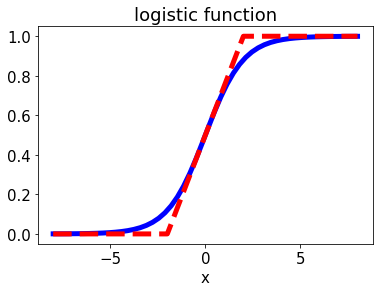

In [ ]:
xrange=numpy.linspace(-2*x_max,2*x_max)
plt.figure()
plt.plot(xrange,logistic(xrange),color="blue")
plt.plot([-2*x_max,-2,2,2*x_max],[0,0,1,1],color="red",label="saturated linear response",linestyle="dashed")
plt.xlabel("x")
title=[]
title.append("logistic function")
plt.title("\n".join(title))
saver("logistic")
plt.show()
plt.close()

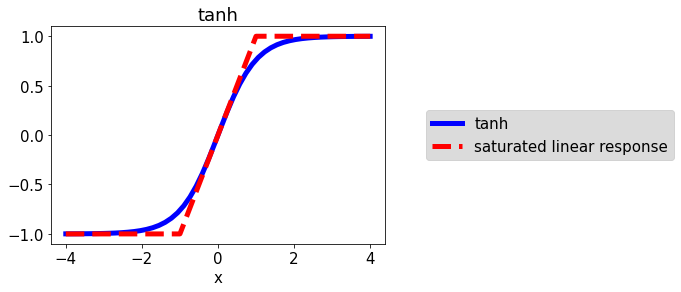

In [ ]:
xrange=numpy.linspace(-x_max,x_max)
plt.figure()
plt.plot(xrange,numpy.tanh(xrange),color="blue",label="tanh")
plt.plot([-x_max,-1,1,x_max],[-1,-1,1,1],color="red",label="saturated linear response",linestyle="dashed")
plt.xlabel("x")
legend("side")
title=[]
title.append("tanh")
plt.title("\n".join(title))
saver("tanh")
plt.show()
plt.close()

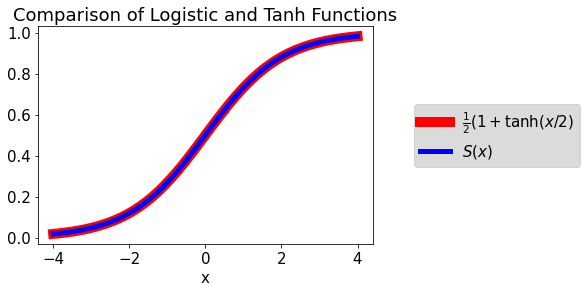

In [ ]:
xrange=numpy.linspace(-x_max,x_max)
plt.figure()
plt.plot(xrange,0.5*(1+numpy.tanh(xrange/2)),color="red",linewidth=10,label=r"$\frac{1}{2}(1+\tanh(x/2)$")
plt.plot(xrange,logistic(xrange),color="blue",label="$S(x)$")
title=[]
title.append("Logistic and Tanh functions")
plt.title("\n".join(title))
plt.xlabel("x")
legend("side")
title=[]
title.append("Comparison of Logistic and Tanh Functions")
plt.title("\n".join(title))
saver("logisticandtanh")
plt.show()
plt.close()

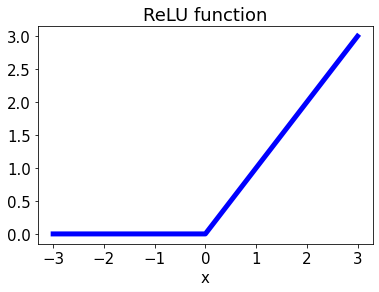

In [ ]:
plt.figure()
plt.plot([-3,0,3],[0,0,3],color="blue")
title=[]
title.append("ReLU function")
plt.title("\n".join(title))
plt.xlabel("x")
saver("ReLU")
plt.show()
plt.close()

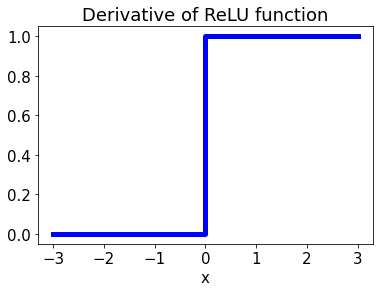

In [ ]:
plt.figure()
plt.step([-3,0,3],[0,1,1],color="blue",where="post")
title=[]
title.append("Derivative of ReLU function")
plt.title("\n".join(title))
plt.xlabel("x")
saver("ReLUprime")
plt.show()
plt.close()

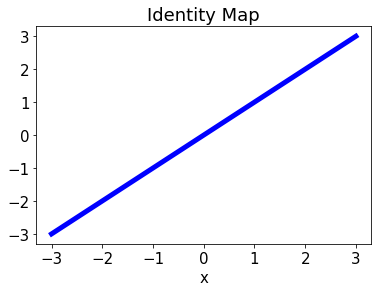

In [ ]:
plt.figure()
plt.plot([-3,3],[-3,3],color="blue")
title=[]
title.append("Identity Map")
plt.title("\n".join(title))
plt.xlabel("x")
saver("identity")
plt.show()
plt.close()